## Ensemble methods

The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

Two families of ensemble methods are usually distinguished:
- In averaging methods, the driving principle is to build several estimators independently and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced. So, some examples are: Bagging methods, Forests of randomized trees, but still exist more classifiers;
- Instead, in boosting methods, base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble. Hence, some examples are: AdaBoost, Gradient Tree Boosting,but still exist more options.

## Random Forests

| Learning Technique | Type of Learner | Type of Learning | Classification | Regression | Ensemble Family |
| --- | --- | --- | --- | --- | --- |
| *RandomForest* | *Ensemble Method (Meta-Estimator)* | *Supervised Learning* | *Supported* | *Supported* | *Averaging Methods* |

The **sklearn.ensemble module** includes two averaging algorithms based on randomized decision trees: the RandomForest algorithm and the Extra-Trees method. Both algorithms are perturb-and-combine techniques, specifically designed for trees. This means a diverse set of classifiers is created by introducing randomness in the classifier construction. The prediction of the ensemble is given as the averaged prediction of the individual classifiers.

In random forests (see RandomForestClassifier and RandomForestRegressor classes), each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set.

The main parameters to adjust when using these methods is *number of estimators* and *maxima features*. The former is the number of trees in the forest. The larger the better, but also the longer it will take to compute. In addition, note that results will stop getting significantly better beyond a critical number of trees. The latter is the size of the random subsets of features to consider when splitting a node. The lower the greater the reduction of variance, but also the greater the increase in bias.

Empirical good default values are maxima features equals to null, that means always considering all features instead of a random subset, for regression problems, and maxima features equals to "sqrt", using a random subset of size sqrt(number of features)) for classification tasks, where number of features is the number of features in the data. The best parameter values should always be cross-validated.

We note that the size of the model with the default parameters is $O( M * N * log (N) )$, where $M$ is the number of trees and $N$ is the number of samples.

In [1]:
from utils.all_imports import *;
%matplotlib inline

None


In [2]:
# Set seed for notebook repeatability
np.random.seed(0)

In [3]:
# READ INPUT DATASET
# =========================================================================== #
dataset_path, dataset_name, column_names, TARGET_COL = get_dataset_location()
estimators_list, estimators_names = get_estimators()

dataset, feature_vs_values = load_brdiges_dataset(dataset_path, dataset_name)

In [4]:
columns_2_avoid = ['ERECTED', 'LENGTH', 'LOCATION']

In [5]:
# Make distinction between Target Variable and Predictors
# --------------------------------------------------------------------------- #
rescaledX, y, columns = prepare_data_for_train(dataset, target_col=TARGET_COL)

Summary about Target Variable {target_col}
--------------------------------------------------
2    57
1    13
Name: T-OR-D, dtype: int64
shape features matrix X, after normalizing:  (70, 11)


In [6]:
# Parameters to be tested for Cross-Validation Approach
# -----------------------------------------------------

# Array used for storing graphs
plots_names = list(map(lambda xi: f"{xi}_learning_curve.png", estimators_names))
pca_kernels_list = ['linear', 'poly', 'rbf', 'cosine', 'sigmoid']
cv_list = list(range(10, 1, -1))
param_grids = []
parmas_random_forest = {
    'n_estimators': list(range(2, 10)),
    'criterion':('gini', 'entropy'),
    'bootstrap': (True, False),
    'min_samples_leaf': list(range(1,5)),
    'max_features': (None, 'sqrt', 'log2'),
    'max_depth': (None, 3, 5, 7, 10,),
    'class_weight': (None, 'balanced', 'balanced_subsample'),
}; param_grids.append(parmas_random_forest)
# Some variables to perform different tasks
# -----------------------------------------------------
N_CV, N_KERNEL, N_GS = 9, 5, 6;
nrows = N_KERNEL // 2 if N_KERNEL % 2 == 0 else N_KERNEL // 2 + 1;
ncols = 2; grid_size = [nrows, ncols]

In [7]:
n_components=9
learning_curves_by_kernels(
# learning_curves_by_components(
    estimators_list[:], estimators_names[:],
    rescaledX, y,
    train_sizes=np.linspace(.1, 1.0, 10),
    n_components=9,
    pca_kernels_list=pca_kernels_list[0],
    verbose=0,
    by_pairs=True,
    savefigs=True,
    scoring='accuracy',
    figs_dest=os.path.join('figures', 'learning_curve', f"Pcs_{n_components}"), ignore_func=True,
    # figsize=(20,5)
)

In [8]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

| Learning Technique | Type of Learner | Type of Learning | Classification | Regression | Ensemble Family |
| --- | --- | --- | --- | --- | --- |
| *RandomForest* | *Ensemble Method (Meta-Estimator)* | *Supervised Learning* | *Supported* | *Supported* | *Averaging Methods* |

Kernel PCA: Linear | RandomForest
              precision    recall  f1-score   support

     class 0       0.30      0.50      0.37         6
     class 1       0.88      0.75      0.81        28

    accuracy                           0.71        34
   macro avg       0.59      0.62      0.59        34
weighted avg       0.77      0.71      0.73        34

Best Score (CV-Train) Best Score (Test)   AUC  P-value
                 0.89              0.71  0.62  0.03960


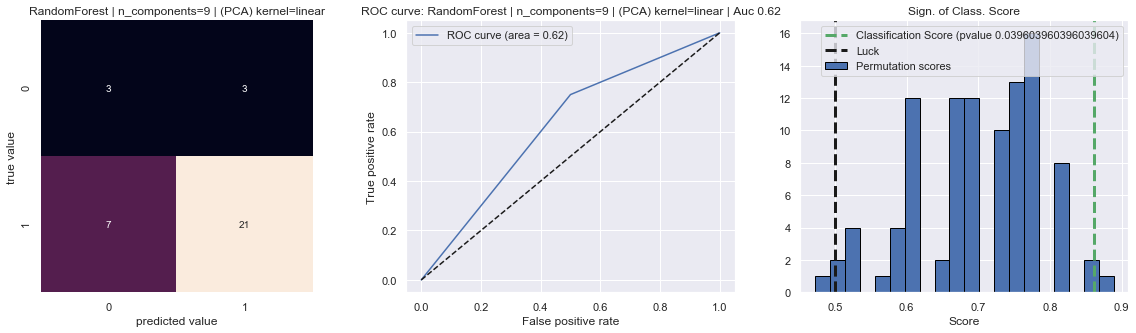

Kernel PCA: Poly | RandomForest
              precision    recall  f1-score   support

     class 0       0.25      0.50      0.33         6
     class 1       0.86      0.68      0.76        28

    accuracy                           0.65        34
   macro avg       0.56      0.59      0.55        34
weighted avg       0.76      0.65      0.68        34

Best Score (CV-Train) Best Score (Test)   AUC  P-value
                 0.94              0.65  0.59  0.02970


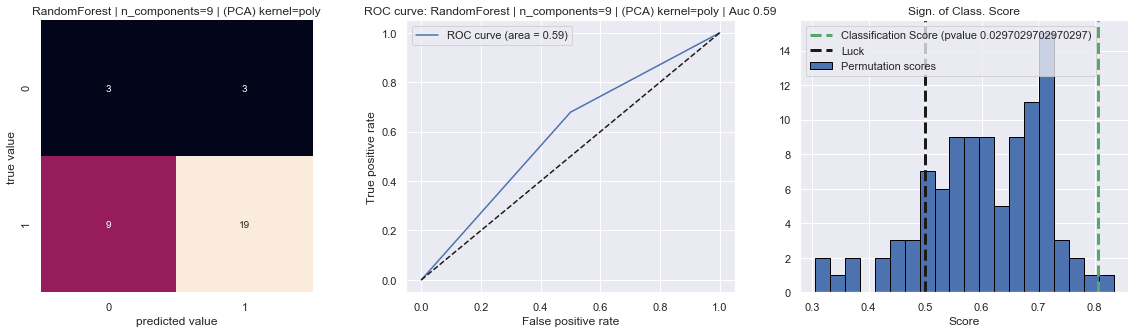

Kernel PCA: Rbf | RandomForest
              precision    recall  f1-score   support

     class 0       0.25      1.00      0.40         6
     class 1       1.00      0.36      0.53        28

    accuracy                           0.47        34
   macro avg       0.62      0.68      0.46        34
weighted avg       0.87      0.47      0.50        34

Best Score (CV-Train) Best Score (Test)   AUC  P-value
                 0.97              0.47  0.68  0.10891


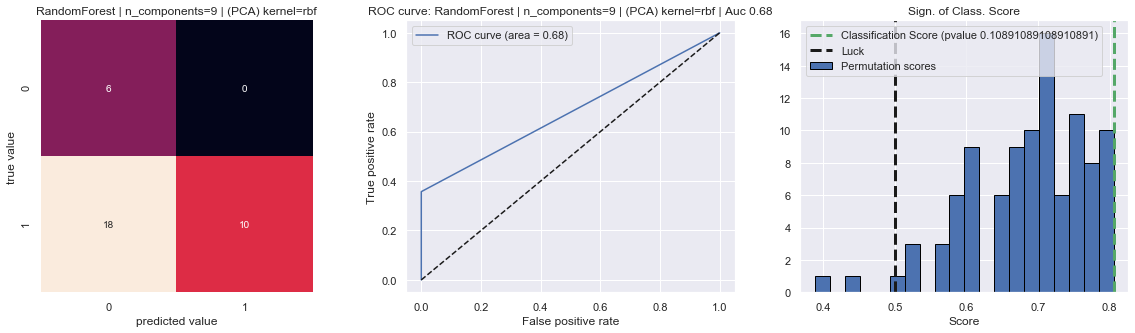

Kernel PCA: Cosine | RandomForest
              precision    recall  f1-score   support

     class 0       0.17      0.33      0.22         6
     class 1       0.82      0.64      0.72        28

    accuracy                           0.59        34
   macro avg       0.49      0.49      0.47        34
weighted avg       0.70      0.59      0.63        34

Best Score (CV-Train) Best Score (Test)   AUC  P-value
                 0.89              0.59  0.49  0.35644


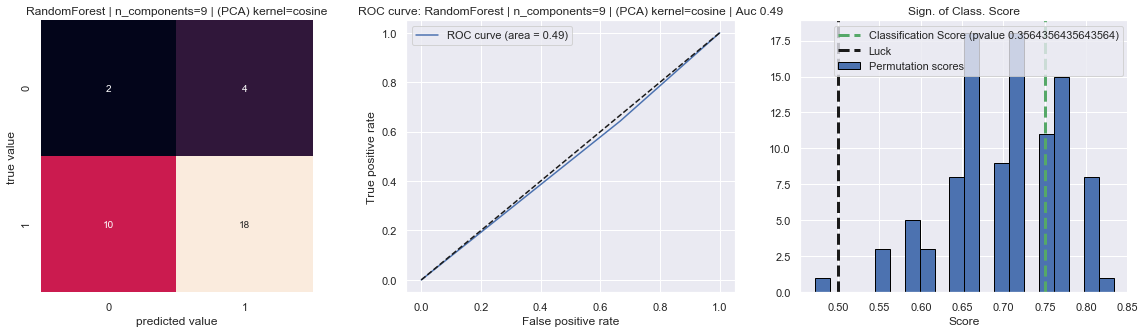

Kernel PCA: Sigmoid | RandomForest
              precision    recall  f1-score   support

     class 0       0.18      0.83      0.29         6
     class 1       0.83      0.18      0.29        28

    accuracy                           0.29        34
   macro avg       0.51      0.51      0.29        34
weighted avg       0.72      0.29      0.29        34

Best Score (CV-Train) Best Score (Test)   AUC  P-value
                 0.86              0.29  0.51  0.52475


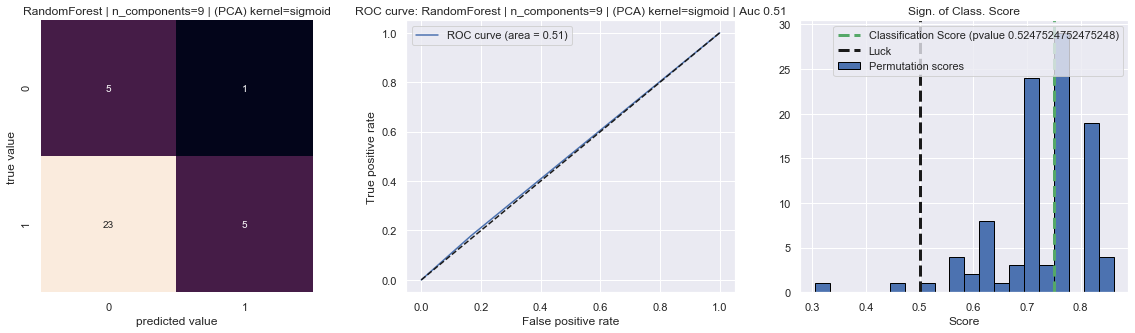

ValueError: too many values to unpack (expected 2)

In [9]:
plot_dest = os.path.join("figures", "n_comp_9_analysis", "grid_search")
X = rescaledX

df_gs, df_auc_gs = grid_search_all_by_n_components(
    estimators_list=estimators_list[6], \
    param_grids=param_grids[0],
    estimators_names=estimators_names[6], \
    X=X, y=y,
    n_components=9,
    random_state=0, show_plots=False, show_errors=False, verbose=1, plot_dest=plot_dest, debug_var=False)
df_9, df_9_auc = df_gs, df_auc_gs

Looking at the results obtained running *RandomForest Classifier* against our dataset splitted into training set and test set and adopting a different kernel trick applied to *kernel-Pca* unsupervised preprocessing method we can state generally speaking that all the such a *Statistical Learning technique* leads to a sequence of results...

- speaking about __Linear kernel Pca based RandomForest Classifier__, when adoping the default threshold of *.5* for classification purposes we have a model that reaches an accuracy of *%* at test time against an accuracy of *%* at train step, while the Auc score reaches a value of *%* with a Roc Curve that shows a behavior for which the model...

- observing __Polynomial kernel Pca based RandomForest Estimator__, we can notice that such a model exploiting a default threshold of *.5* reaches an accuracy of *%* at test time against an accuracy of *%* at train step, while the Auc score reaches a value of *%*...

- review __Rbf kernel Pca based RandomForest Classifier__, we can notice that such a model exploiting a default threshold of *.5* reaches an accuracy of *%* at test time against an accuracy of *%* at train step, while the Auc score reaches a value of *%*...

- looking at __Cosine kernel Pca based RandomForest Classifier__, we can notice that such a model exploiting a default threshold of *.5* reaches an accuracy of *%* at test time against an accuracy of *%* at train step, while the Auc score reaches a value of *%*.

- finally, referring to __Sigmoid kernel Pca based RandomForest Model__, we can notice that such a model exploiting a default threshold of *.5* reaches an accuracy of *%* at test time against an accuracy of *%* at train step, while the Auc score reaches a value of *%*.

In [ ]:
create_widget_list_df([df_gs, df_auc_gs]) #print(df_gs); print(df_auc_gs)

Looking at the table dispalyed just above that shows the details about the selected values for hyper-parameters specified during grid search, in the different situations accordingly to the fixed kernel-trick for kernel Pca unsupervised method we can state that, referring to the first two columns of *Train and Test Accuracy*, we can recognize which trials lead to more overfit results such as for *Cosine, and Sigmoid Tricks* or less overfit solution such as in the case of *Linear, Polynomial, and Rbf Trick*. Speaking about the hyper-parameters, we can say what follows:

- looking at __n_estimators hyper-parameter__, which refers to the number of trees in the forest, ...

- reviewing __criterion parameter__, whcich represents the *function to measure the quality of a split* where supported criteria are *“gini”* for the Gini impurity and *“entropy”* for the information gain and this parameter is *tree-specific*...

- speaking about __bootstrap hyper-parameter__, we know that enabling it *bootstrap samples* are used when building trees, otherwise if disabled, the whole dataset is used to build each tree...

- looking at __min_samples_leaf hyper-param__, describes the minimum number of samples required to be at a leaf node...

- describing __max_features hyper-param__, a hyper-param as this referes to the number of features to consider when looking for the best split, and supported choicea are *“auto”, “sqrt”, “log2”*. If “auto”, then max_features=sqrt(n_features). If “sqrt”, then max_features=sqrt(n_features) (same as “auto”). If “log2”, then max_features=log2(n_features). And, finally If None, then max_features=n_features. We notice that the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.

- looking at __max_depth hyper-param__, it reflects the maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than *min_samples_split samples*...

- viewing __class_weight hyper-param__, referes to weights associated with classes and if not given, all classes are supposed to have weight one. The *“balanced”* mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)). The *“balanced_subsample”* mode is the same as “balanced” except that weights are computed based on the bootstrap sample for every tree grown.


If we imagine to build up an *Ensemble Classifier* from the family of *Average Methods*, which state that the underlying principle leading their creation requires to build separate and single classifiers than averaging their prediction in regression context or adopting a majority vote strategy for the classification context, we can claim that amongst the purposed Knn classifier, for sure, we could employ the classifier foudn from the first three trials because of their performance metrics and also because Ensemble Methods such as Bagging Classifier, usually work fine exploiting an ensemble of independent and fine tuned classifier differently from Boosting Methods which instead are based on weak learners.

### Random Forest Classifiers References
- (Ensemble, Non-Parametric Learning: RandomForest) https://scikit-learn.org/stable/modules/ensemble.html#forest